# Training and testing a simple MLP with Pytorch

## Objectives

- Classify images with pytorch, using MLPs
- Get acquainted with common datasets
- See the effect of the different network architectures

At each step you are encouraged to change parameters to see what works and what does not. 

## TODO

Try different architectures:
    
    - 1 hidden layer
    - no hidden layer
    - several hidden layers

What is the effect of the architecture on the training and accuracy ? How does it change with the dataset ?

## 0) Useful things

We import python and pytorch packages

Now the eval and train functions come from a separate file, for simplicity.

In [ ]:
import torch
import torch.nn as nn  # the neural network library of pytorch
import torch.nn.functional as F  # functions of the neural network library
import load_dataset as load  # module with function to load data
from eval_train import eval_net, train_net
import numpy as np
import matplotlib.pyplot as plt  # to plot figures
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix
import numpy as np

We load the dataset

In [ ]:
batch_size = 256  # the number of examples per batch
train_loader, test_loader, dim_in, dim_out = load.load_FashionMNIST(batch_size=batch_size)

## 1) Defining a neural network with pytorch

We define the network, using pytorch tools. 

In [ ]:
class MLP(nn.Module):
    def __init__(self, dim_in, dim_hidden, dim_out):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(dim_in, dim_hidden)
        self.fc2 = nn.Linear(dim_hidden, dim_out)
        self.flat = nn.Flatten()  

    def forward(self, x):
        x = self.flat(x) 
        x = self.fc1(x)  
        x = F.relu(x)  
        x = self.fc2(x)  
        return x  

We create an instance of this MLP with the correct dimensions.

You can choose and change the size of the hidden layer.

In [ ]:
dim_hidden = 100  # play with this number to see what happens
network = MLP(dim_in, dim_hidden, dim_out)

## 2) Training  and testing the neural network

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
learning_rate = 1e-2  # the scale of the changes applied to the weights
optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)  # Adam 
#optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)  # Stochastic Gradient Descent 

In [ ]:
test_loss, test_accuracy = eval_net(network, test_loader, criterion)
print('Network before training')
print(f'Evaluation on test set: Loss = {test_loss:.6f}, accuracy = {test_accuracy*100:.4f} %')

Network before training
Evaluation on test set: Loss = 2.393433, accuracy = 9.3400 %


In [ ]:
loss_list = []
accuracy_list = []
for epoch in range(10):
    train_loss, train_accuracy = train_net(network, train_loader, criterion, optimizer)
    loss_list.append(train_loss)
    accuracy_list.append(train_accuracy*100)
    
    print(f'Epoch {epoch}: Loss = {train_loss:.6f}, accuracy = {train_accuracy*100:.4f} %')

Epoch 0: Loss = 0.513901, accuracy = 81.9450 %
Epoch 1: Loss = 0.379677, accuracy = 86.1200 %
Epoch 2: Loss = 0.343421, accuracy = 87.4433 %
Epoch 3: Loss = 0.331317, accuracy = 87.8667 %
Epoch 4: Loss = 0.320501, accuracy = 88.1517 %
Epoch 5: Loss = 0.315179, accuracy = 88.3433 %
Epoch 6: Loss = 0.307451, accuracy = 88.7433 %
Epoch 7: Loss = 0.305118, accuracy = 88.8750 %
Epoch 8: Loss = 0.300826, accuracy = 88.8633 %
Epoch 9: Loss = 0.285298, accuracy = 89.3100 %


Text(0.5, 0.98, 'Training a 1 hidden layer MLP on MNIST')

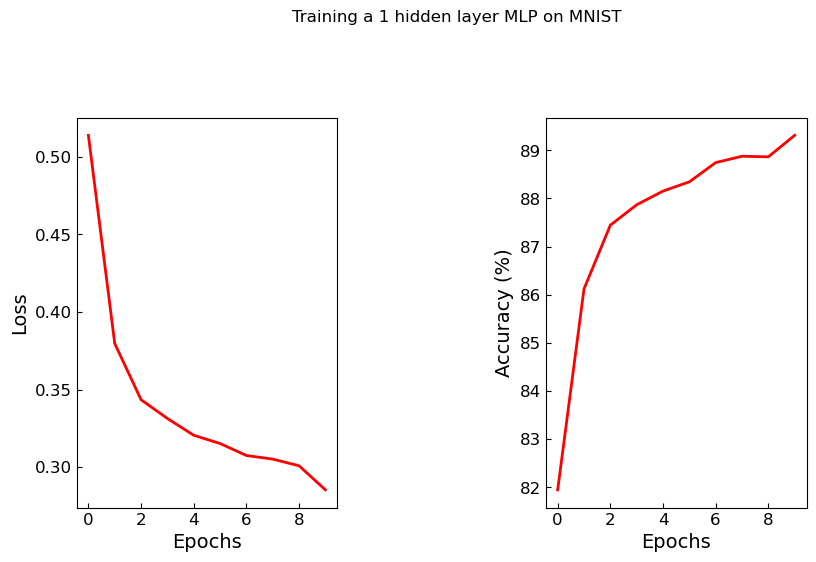

In [ ]:
plt.style.use('plot_style.mplstyle')  # A file with parameters on what you want the figure to look like
fig, ax = plt.subplots(1, 2)  # a figure with 1 row and 2 columns of subplots
# fig is the figure itself, ax is an array of two independent subplots inside fig
# on the left side, plot the losses. 
ax[0].plot(loss_list, c='red', ls='-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
# on the right side, plot the accuracies. 
ax[1].plot(accuracy_list, c='red')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
# We put a title for our figure.
fig_title = f'Training a 1 hidden layer MLP on MNIST' # change the title
fig.suptitle(fig_title)

You can save this figure to have a way to compare and remember results

In [ ]:
fig.savefig(f'fig_name_with_useful_info.jpeg')

Now we test the network. Typically the accuracy on the test set is lower than on the training set because it has not been trained on this data.

In [ ]:
test_loss, test_accuracy = eval_net(network, test_loader, criterion)
print('Network after training')
print(f'Evaluation on test set: Loss = {test_loss:.6f}, accuracy = {test_accuracy*100:.4f} %')

Network after training
Evaluation on test set: Loss = 0.406793, accuracy = 86.5300 %


# 3) Looking at the errors

Let's look at which images where poorly classified.

In [ ]:
pred = network(test_loader.dataset.data[:].float()).argmax(axis=1)

In [ ]:
idxs = torch.nonzero(((pred == test_loader.dataset.targets[:]) == False)).squeeze()
print(f'The number of misclassified images is {idxs.size()[0]}')

The number of misclassified images is 1958


In [ ]:
#Excecute this cell for fashionMNIST
dic = {'0': 'T-shirt/top',
'1':'Trouser',
'2' :'Pullover',
'3' :'Dress',
'4' :'Coat',
'5' :'Sandal',
'6' :'Shirt',
'7' :'Sneaker',
'8' :'Bag',
'9' :'Ankle boot'}

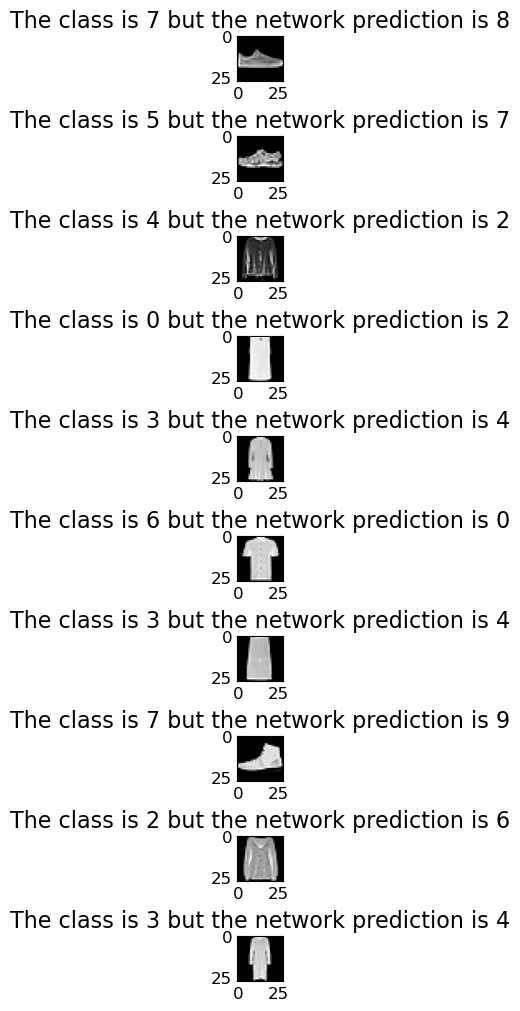

In [ ]:
im_size = 28 # the size of the image side. 8 for digits, 28 for MNIST/FashionMNIST
n_images = min(idxs.size()[0], 10)
fig, ax = plt.subplots(n_images, constrained_layout=True)
fig.set_size_inches(10,10)
for n in range(n_images):
    sample = test_loader.dataset.data[idxs[n]].reshape(im_size,im_size)
    sample_target = test_loader.dataset.targets[idxs[n]]  
    ax[n].imshow(sample, cmap="gray")
    #pred_item = dic[f'{pred[idxs[n]]}'] # if fashion MNIST
    pred_item = pred[idxs[n]] # if digits or MNIST
    #class_item = dic[f'{sample_target}'] # if fashion MNIST
    class_item = sample_target # if digits or MNIST
    ax[n].set_title(f'The class is {class_item} but the network prediction is {pred_item}')

We can also look at the confusion matrix. 

In [ ]:
# Execute this cell for Fashion MNIST
class_names = [dic[str(i)] for i in range(len(dic))] # for FashionMNIST

In [ ]:
# Execute this cell for digits or MNIST
class_names = [str(i) for i in range(10)] # for digits and MNIST

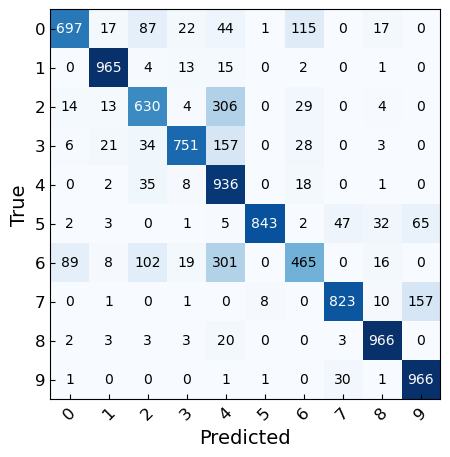

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(test_loader.dataset.targets[:], pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

# 4) Looking at weights

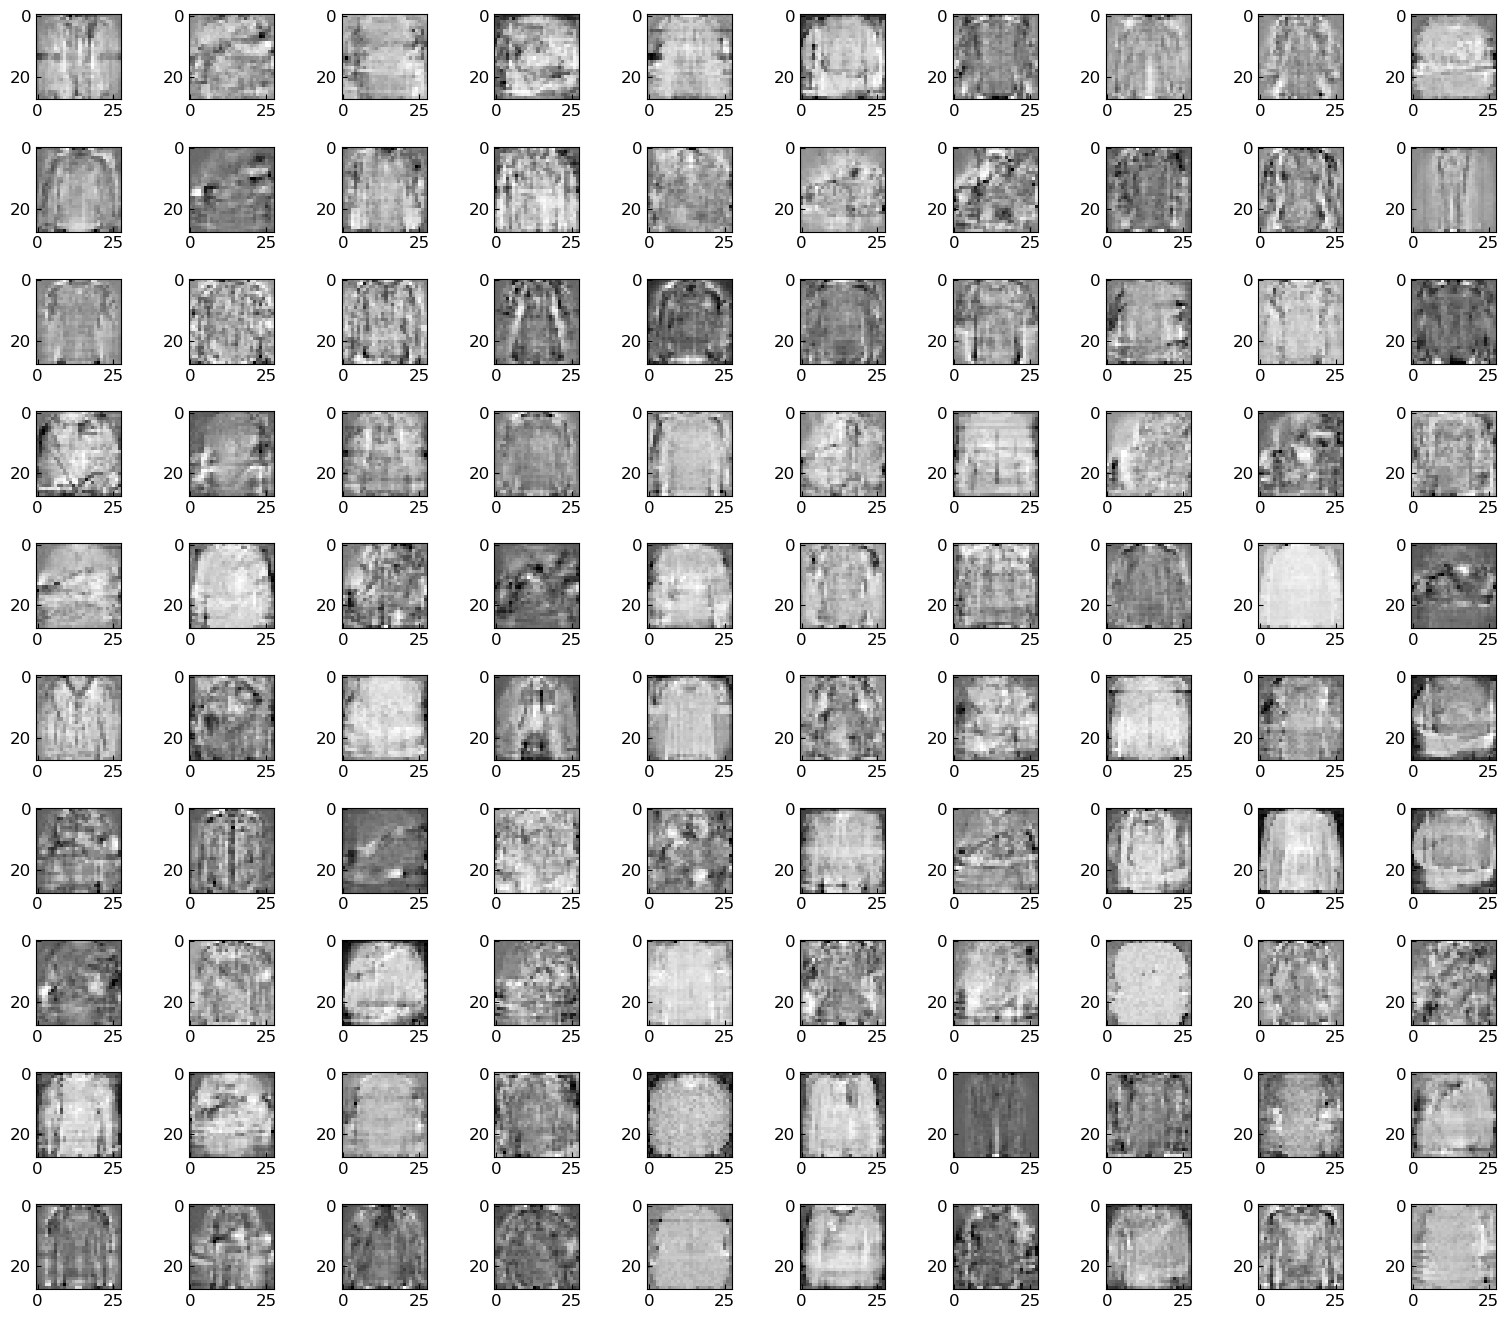

In [ ]:
fig, ax = plt.subplots(10, 10) # adjust depending on the number of weights
fig.set_size_inches(20,20)
ax = ax.flatten()
for i in range(dim_hidden): # adjust depending on the number of weights
    # adjust depending on which layer you are looking at
    ax[i].imshow(network.fc1.weight[i, :].detach().numpy().reshape(im_size, im_size), cmap='Greys')
plt.show()